In [153]:
from mtree import MTree
import numpy as np
import matplotlib.pyplot as plt
import random

plt.style.use('default')
colors = ['tab:red', 'tab:purple', 'tab:blue', 'tab:green', 'tab:orange', 'tab:pink', 'tab:cyan', 'tab:grey', 'tab:brown', 'tab:olive']

In [154]:
def plot_vectors(vectors, query_idx = -1, colored = True):
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.grid(True, which='both')
    
    n = len(vectors)
    random.shuffle(colors)
    
    if query_idx == -1:
        query_idx = n-1
    
    for i in range(n):
        v = vectors[i]['vector']
        
        if colored:
            querycolor = 'red'
            c = colors[i]
        else:
            querycolor = 'tab:red'
            c = 'tab:grey'
            
        if i == query_idx:
            plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=querycolor, label=vectors[i]['id'])
        else:
            plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=c, label=vectors[i]['id'])

    if n < 20:
        plt.legend()
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Plot of 2D Vectors')

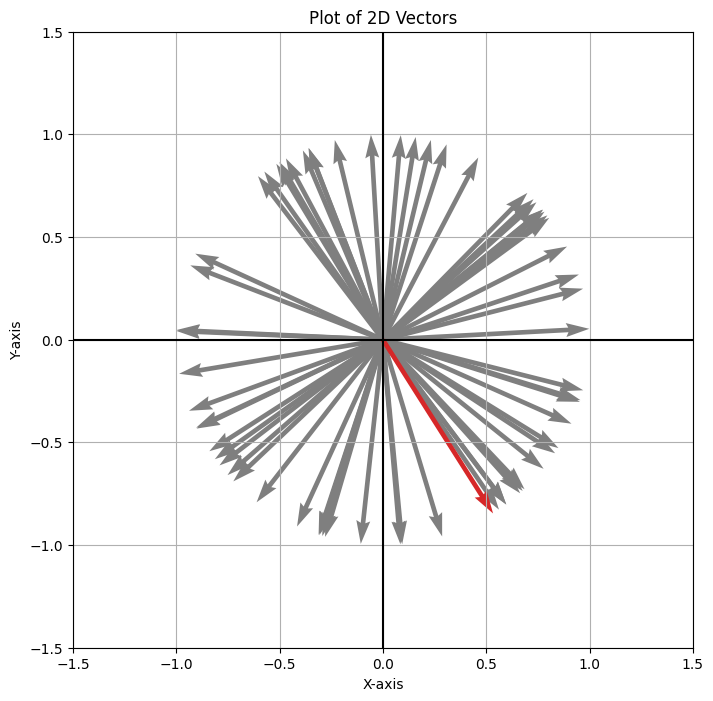

In [155]:
# vectors = [{'id': 0, 'vector': np.array([0.40628867, 0.91374478])},
#  {'id': 1, 'vector': np.array([-0.7970254 , -0.60394579])},
#  {'id': 2, 'vector': np.array([-0.85851361, -0.51279078])},
#  {'id': 3, 'vector': np.array([-0.99462168, -0.10357464])},
#  {'id': 4, 'vector': np.array([0.05007814, 0.9987453 ])},
#  {'id': 5, 'vector': np.array([ 0.27767293, -0.96067567])},
#  {'id': 6, 'vector': np.array([-0.95920095,  0.28272521])},
#  {'id': 7, 'vector': np.array([-0.81310667, -0.58211472])},
#  {'id': 8, 'vector': np.array([-0.85574366,  0.51740003])},
#  {'id': 9, 'vector': np.array([-0.09603405, -0.99537805])}]

vectors = []
n = 64
for i in range(n):
    v = 2*np.random.rand(2) - 1
    vectors.append({'id': i, 'vector': v/np.linalg.norm(v)})
plot_vectors(vectors, colored=False)

In [156]:
def dcos(x ,y):
    return 1 - np.dot(x['vector'], y['vector'])

def dL2(x ,y):
    return np.sqrt(2 * dcos(x, y))

def L2(x, y):
    return np.linalg.norm(x['vector'] - y['vector'])

tree = MTree(L2, max_node_size=4)

In [157]:
for i in range(n):
    if i == n-1:
        continue
    else:
        tree.add(vectors[i])

In [158]:
# k-NN search
k = 8
result = list(tree.search(vectors[n-1], k))
result

[{'id': 25, 'vector': array([ 0.56159979, -0.82740901])},
 {'id': 43, 'vector': array([ 0.59658992, -0.80254624])},
 {'id': 7, 'vector': array([ 0.59702843, -0.80222008])},
 {'id': 54, 'vector': array([ 0.66403696, -0.74769975])},
 {'id': 27, 'vector': array([ 0.67641792, -0.73651803])},
 {'id': 50, 'vector': array([ 0.68536534, -0.72819938])},
 {'id': 4, 'vector': array([ 0.28665821, -0.95803292])},
 {'id': 3, 'vector': array([ 0.77765847, -0.62868697])}]

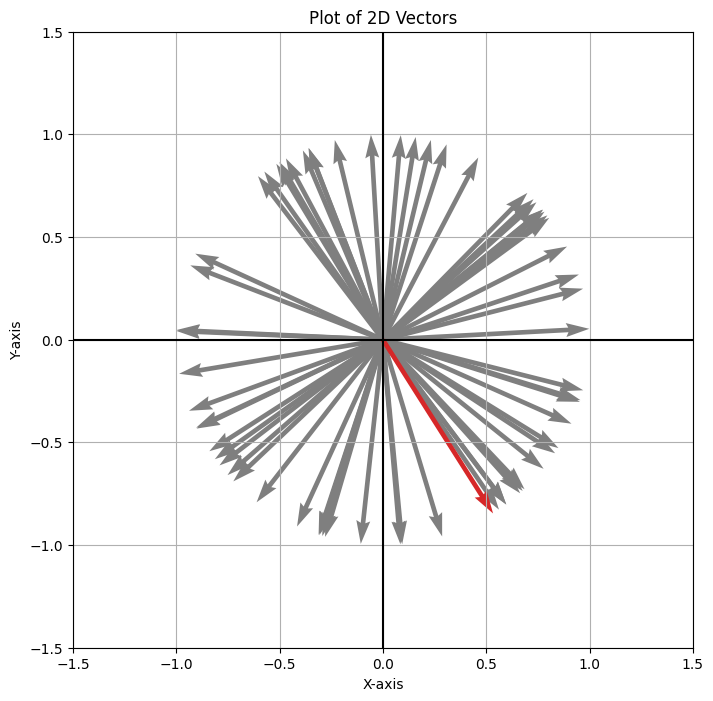

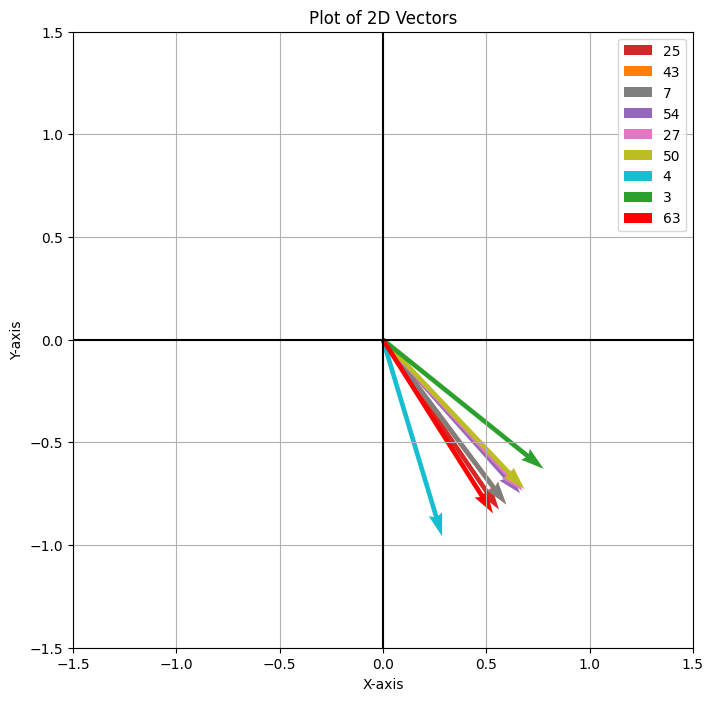

In [159]:
result.append(vectors[n-1])
plot_vectors(vectors, colored=False)
plot_vectors(result)

# Inicio

1. Começa com root e distância mínima 0.
2. Começa com lista dos knn com todas distâncias infinitas.
3. Distância mínima < maior distância dos knn => prossegue

# Busca

(Busca na raiz)

1. Para cada entrada E no nó
2. Calcula dmin := max{d(E, Q) - r(E), 0}

    dmin é um limite inferior da distância de Q para qualquer objeto dentro de E (se Q estiver dentro de E, então é 0).

    ![](imgs/dmin.png)

3. Se dmin > maior distancia do knn, entao posso descartar todos os objetos nessa entrada
4. Mas como está em infinito, eu entro.
5. Adiciono a subárvore dessa entrada.
6. Calcula dmax := d(E, Q) + r(E)

    dmax é um limite superior da distância de Q para qualquer objeto dentro de E

    ![](imgs/dmax.png)

7. Se dmax < maior distancia do knn, então com certeza tem alguém dentro de E que vai entrar
8. Atualizo o maior valor de knn para dmax.

**Aqui o código parece estar errando**

9.  Removo de PR todos que tem a distancia minima > dmax.